# model-evaluation

Evaluating the trained Next Basket predictor.

Requires:
1. `data/x_test.npy`
2. `data/y_test.npy`
3. `data/mcc2id.json`
4. `model/model.hdf5`

Produces:

In [74]:
import sys
sys.path.append('..')

In [46]:
import numpy as np
import tensorflow as tf

from config import x_test_fpath, y_test_fpath, mcc2id_fpath, model_fpath

In [73]:
fig, axes = plt.subplots(nrows=4, ncols=4)
plt.subplots_adjust(wspace=0.25, hspace=0.25)
fig.set_size_inches(20, 20)
axes = axes.flatten()

fig.suptitle('Precision-Recall curve', fontsize=16, fontweight='bold')

for mid, ax in zip(y_test.sum(axis=0).argsort()[::-1], axes):
    mcc = mccs[mid]

    x, y, _ = precision_recall_curve(y_test[:, mid] > 0, y_pred[:, mid])
    score = auc(y, x)

    ax.plot([0, 1], [1, 0], ls='dashed')
    ax.plot(y, x)

    ax.set_title(f'MCC: {mcc}. AUC: {round(score, 4)}')
    ax.set_xlabel('recall')
    ax.set_ylabel('precision')

NameError: name 'plt' is not defined

In [116]:
def get_top5_mccs(probas: np.ndarray) -> set:
    top5_ids = probas.argsort()[-5:]
    top5_ids = [id_ for id_ in top5_ids if probas[id_] > 0]
    top5_mccs = {mccs[id_] for id_ in top5_ids}
    
    return top5_mccs

In [117]:
def jaccard(set1: set, set2: set) -> float:
    return len(set.intersection(set1, set2)) / len(set.union(set1, set2))

In [118]:
y_test_top5 = [get_top5_mccs(vector) for vector in y_test]
y_pred_top5 = [get_top5_mccs(vector) for vector in y_pred]

Text(0, 0.5, 'probability')

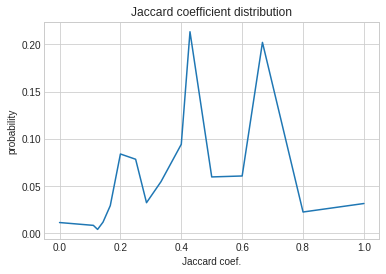

In [122]:
jac = [jaccard(s1, s2) for s1, s2 in zip(y_test_top5, y_pred_top5)]
jac = pd.Series(jac).value_counts().sort_index()
jac = jac / jac.sum()

plt.plot(jac)
plt.title('Jaccard coefficient distribution')
plt.xlabel('Jaccard coef.')
plt.ylabel('probability')